<a href="https://colab.research.google.com/github/BHARGAVIGHEGDE/Machine_learning_projects/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor


In [ ]:
#loading the dataset
gold=pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold.shape

(2290, 6)

In [ ]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#finding the corelation
correlation= gold.corr()

<Axes: >

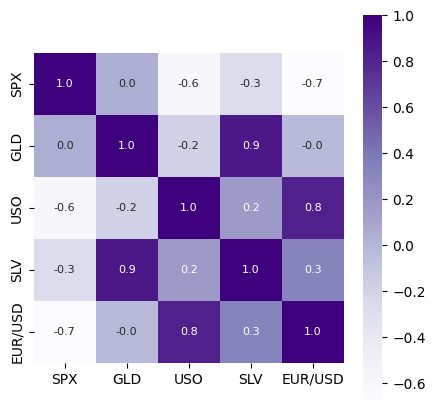

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Purples')

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-13-7a0d1d25b3e6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

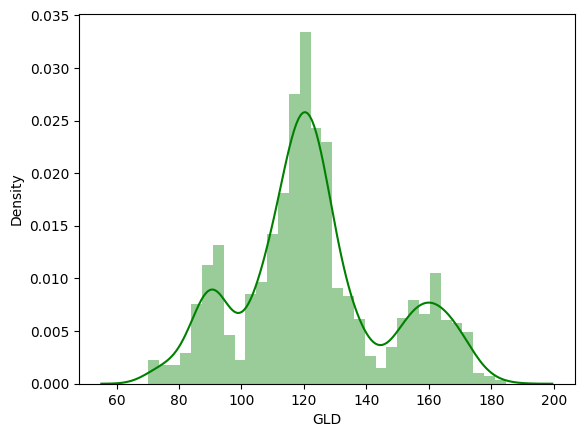

In [ ]:
#checking the ditribution of gold price
sns.distplot(gold['GLD'],color='green')

In [ ]:
#splitting x and y
x=gold.drop(columns=['Date','GLD'],axis=1)
y=gold['GLD']

In [ ]:
print(x)


              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)


0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
#splitting into training data and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [ ]:
print(x_train.shape,x_test.shape)

(1832, 4) (458, 4)


In [ ]:
print(y_train.shape,y_test.shape)

(1832,) (458,)


In [ ]:
#training the model
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
#model evaluation on test data  
test_prediction=regressor.predict(x_test)
print(test_prediction)



[164.66200021 127.52489881 124.15629967 119.59639895 125.91039897
  86.0962983  171.70540192 136.63929969 106.82930054 132.85530133
 120.37089938 124.77500055 143.13949864 104.53249989  80.71319909
 119.63250027 140.39960064  90.37220027  91.40719956 128.35720208
 125.94809928 147.75819961 116.58210183 152.80599825 129.35379914
 129.62820055 118.3167012  111.42590051 168.72540177 157.3414987
 126.0951016  154.03930157 127.00479981 122.70939768 116.37280171
 154.25719973 114.92610005 120.44590103 103.78870199 105.36360024
 134.99129914  85.72579929 156.61940141 121.54069999 122.31490061
 155.48290094 120.56940037 116.65929992 168.71160287 116.52140061
 138.80830213 162.05379894 158.42660032 153.21470108 123.93700055
 117.00079988 167.11100091 117.2612995  165.70770064  84.10890041
 121.3913989  122.07140001 119.86380029 172.04969893 118.86509978
 180.95499595 162.21120287 138.24320265 115.64280015  92.57340056
 171.96620044 117.82599958 117.72659864 125.61669984 147.15159945
  91.244501

In [ ]:
#R square error
r_square=metrics.r2_score(y_test,test_prediction)
print("the r square error is",r_square)


#mean square error
mean_error=metrics.mean_absolute_error(y_test,test_prediction)
print("the mean square erroe is",mean_error)


the r square error is 0.9846320500292642
the mean square erroe is 1.3860526517903895


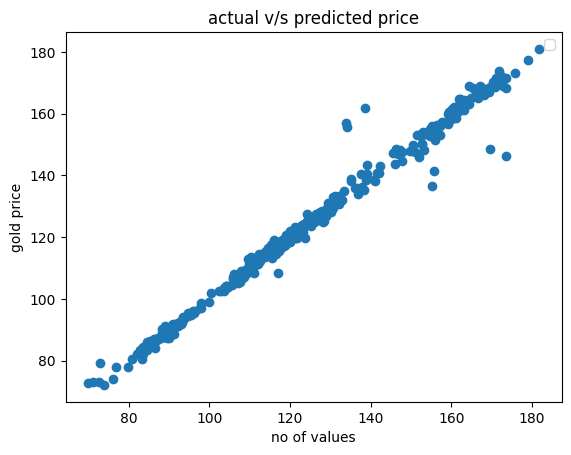

In [34]:
#comapring the actual and the predicted price

plt.scatter(y_test,test_prediction)

plt.xlabel("no of values")
plt.ylabel("gold price")
plt.title("actual v/s predicted price")
plt.legend()
plt.show()